In [4]:
import pandas as pd
df=pd.read_excel("sales_dataset.xlsx")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [5]:
# Logic: Demand must be at least equal to Sales.
# If Demand < Sales, we update Demand to be slightly higher than Sales (simulating some lost interest) or equal.
df['Demand'] = df[['Demand', 'Units Sold']].max(axis=1)

Season
Winter    1843181
Summer    1761945
Autumn    1610020
Spring    1535730
Name: Units Sold, dtype: int64


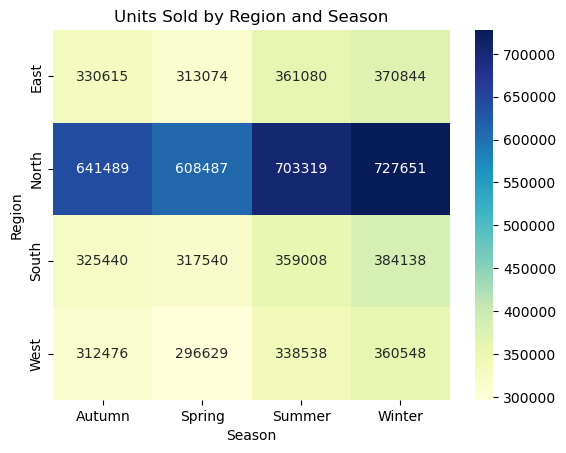

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert Date to datetime and extract Season
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Define a simple function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# 2. Pattern: Which Season has more purchases?
seasonal_sales = df.groupby('Season')['Units Sold'].sum().sort_values(ascending=False)
print(seasonal_sales)

# 3. Pattern: Which Region sold more in various seasons?
regional_seasonal = df.groupby(['Region', 'Season'])['Units Sold'].sum().unstack()
sns.heatmap(regional_seasonal, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Units Sold by Region and Season")
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset (good practice to be self-contained in cells)
df = pd.read_excel('sales_dataset.xlsx')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # Assuming DD-MM-YYYY format based on "01-01-2022"

# 1. Sales by Seasonality
seasonal_sales = df.groupby('Seasonality')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='Seasonality', y='Units Sold', palette='viridis')
plt.title('Total Units Sold by Seasonality')
plt.ylabel('Total Units Sold')
plt.xlabel('Season')
plt.savefig('sales_by_seasonality.png') # Save plot
plt.close()

# 2. Regional Sales across Seasons
regional_seasonal = df.groupby(['Region', 'Seasonality'])['Units Sold'].sum().unstack()

plt.figure(figsize=(12, 7))
sns.heatmap(regional_seasonal, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Units Sold by Region and Seasonality')
plt.savefig('regional_seasonal_heatmap.png') # Save plot
plt.close()

# 3. Sales by Category (Adding value)
category_sales = df.groupby('Category')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Units Sold', palette='magma')
plt.title('Total Units Sold by Category')
plt.xticks(rotation=45)
plt.savefig('sales_by_category.png') # Save plot
plt.close()

# 4. Monthly Trend (Adding value)
df['MonthYear'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('MonthYear')['Units Sold'].sum().reset_index()
monthly_trend['MonthYear'] = monthly_trend['MonthYear'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='MonthYear', y='Units Sold', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Units Sold')
plt.xlabel('Month-Year')
plt.savefig('monthly_sales_trend.png') # Save plot
plt.close()

# Print specific insights to include in the text response
print("Seasonal Sales:\n", seasonal_sales)
print("\nRegional Seasonal Sales:\n", regional_seasonal)
print("\nCategory Sales:\n", category_sales)

C:\Users\bhuve\AppData\Local\Temp\ipykernel_23704\2334049032.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_sales, x='Seasonality', y='Units Sold', palette='viridis')
C:\Users\bhuve\AppData\Local\Temp\ipykernel_23704\2334049032.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Units Sold', palette='magma')


Seasonal Sales:
   Seasonality  Units Sold
3      Winter     1843181
2      Summer     1761945
0      Autumn     1610020
1      Spring     1535730

Regional Seasonal Sales:
 Seasonality  Autumn  Spring  Summer  Winter
Region                                     
East         330615  313074  361080  370844
North        641489  608487  703319  727651
South        325440  317540  359008  384138
West         312476  296629  338538  360548

Category Sales:
       Category  Units Sold
3    Groceries     3127335
0     Clothing     1150873
2    Furniture      880654
4         Toys      834679
1  Electronics      757335


In [11]:
monthly_trend = df.groupby('MonthYear')['Units Sold'].sum().reset_index()
monthly_trend = monthly_trend.sort_values('MonthYear')
monthly_trend['MonthYear'] = monthly_trend['MonthYear'].astype(str)


In [12]:
df.isnull().sum()
df.fillna(method='ffill', inplace=True)


C:\Users\bhuve\AppData\Local\Temp\ipykernel_23704\2354036562.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


C:\Users\bhuve\AppData\Local\Temp\ipykernel_23704\3684661167.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_sales, x='Seasonality', y='Units Sold', palette='viridis')


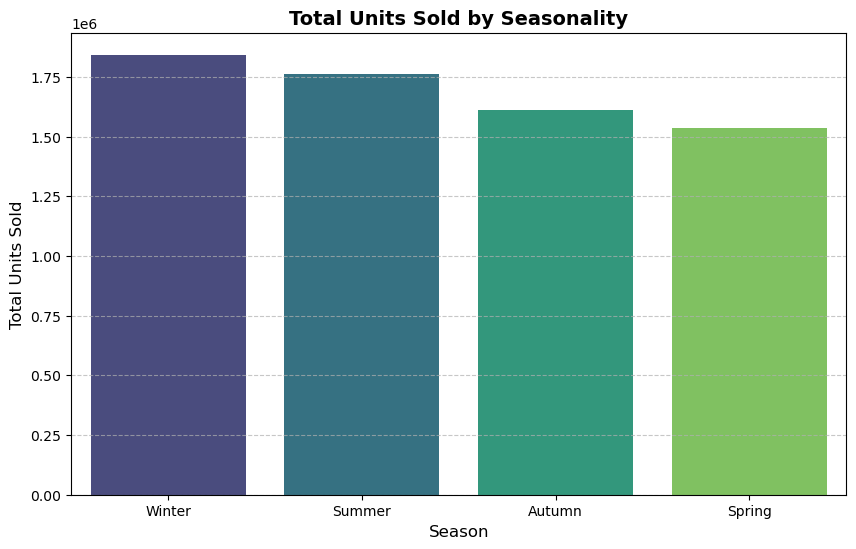

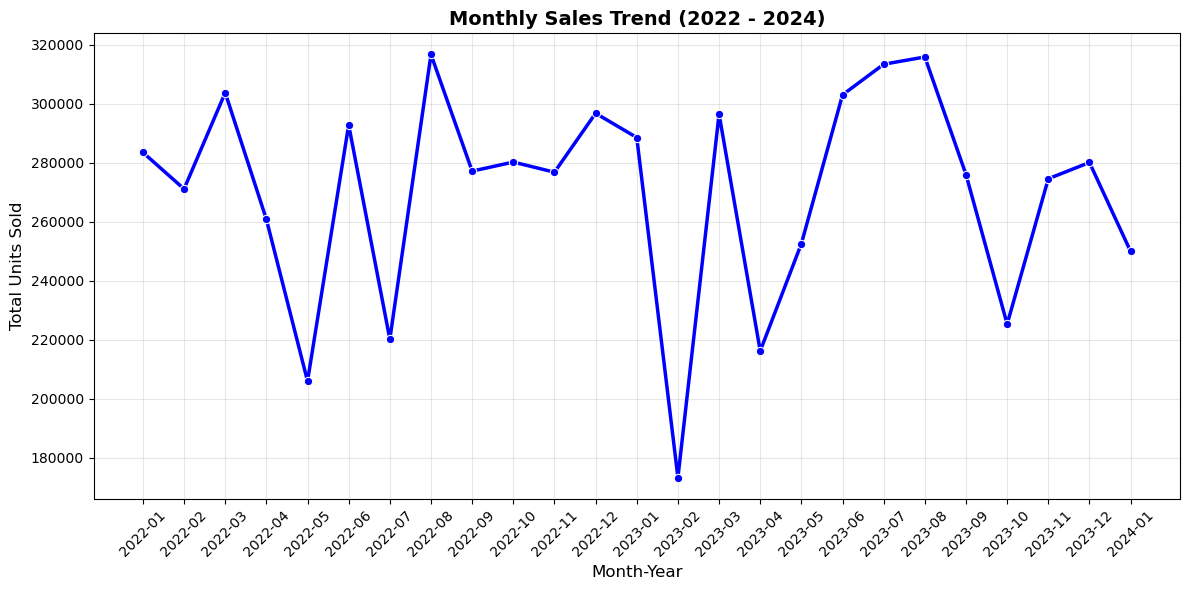

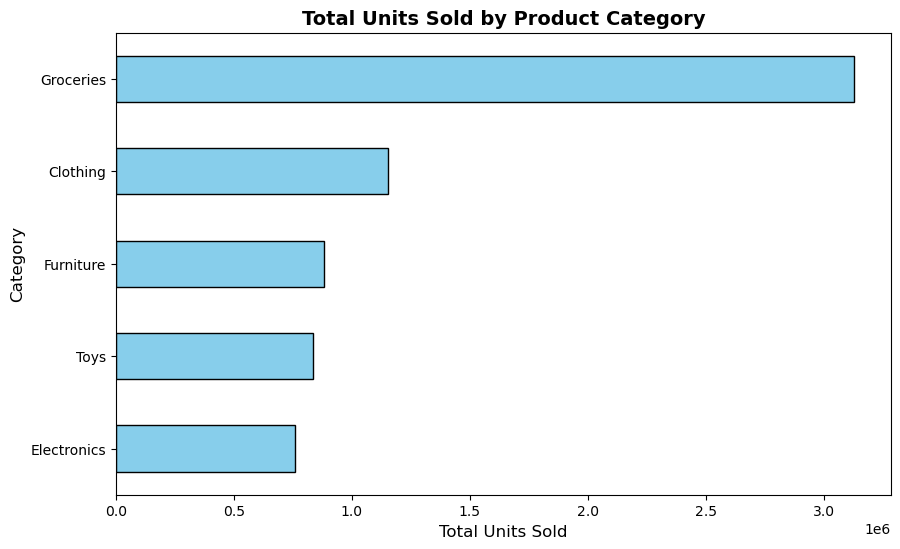

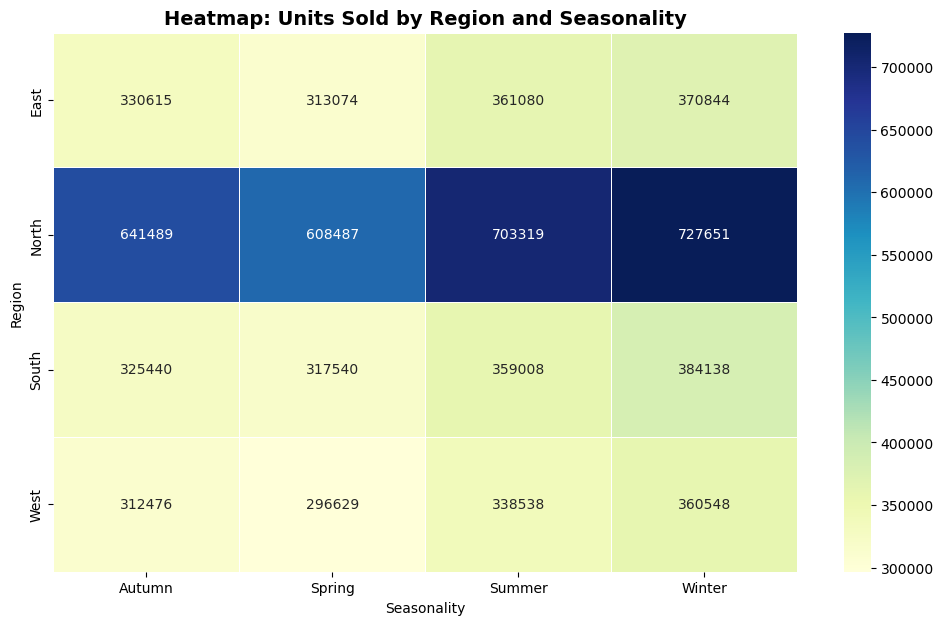

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your dataset
df = pd.read_excel('sales_dataset.xlsx')

# 2. Data Cleaning & Logic Fix
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# FIX: Ensure Demand is never less than Units Sold (Critical for your AI model)
df['Demand'] = df[['Demand', 'Units Sold']].max(axis=1)

# ---------------------------------------------------------
# CHART 1: Total Units Sold by Seasonality (Bar Chart)
# ---------------------------------------------------------
seasonal_sales = df.groupby('Seasonality')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='Seasonality', y='Units Sold', palette='viridis')
plt.title('Total Units Sold by Seasonality', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------------------------------------------------------
# CHART 2: Monthly Sales Trend (Line Graph)
# ---------------------------------------------------------
df['MonthYear'] = df['Date'].dt.to_period('M')
monthly_trend = df.groupby('MonthYear')['Units Sold'].sum().reset_index()
monthly_trend['MonthYear'] = monthly_trend['MonthYear'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='MonthYear', y='Units Sold', marker='o', color='blue', linewidth=2.5)
plt.title('Monthly Sales Trend (2022 - 2024)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xlabel('Month-Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# CHART 3: Sales by Category (Horizontal Bar Chart)
# ---------------------------------------------------------
category_sales = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Total Units Sold by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Total Units Sold', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

# ---------------------------------------------------------
# CHART 4: Regional Distribution (Heatmap)
# ---------------------------------------------------------
regional_seasonal = df.groupby(['Region', 'Seasonality'])['Units Sold'].sum().unstack()

plt.figure(figsize=(12, 7))
sns.heatmap(regional_seasonal, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap: Units Sold by Region and Seasonality', fontsize=14, fontweight='bold')
plt.show()

In [17]:
df.to_csv("cleaned_sales_data.csv", index=False)


In [19]:
X = df.drop(['Demand', 'Date'], axis=1)
y = df['Demand']


In [21]:
X = pd.get_dummies(X, drop_first=True)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
# =========================================================
# 1. IMPORT LIBRARIES
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================================================
# 2. LOAD DATA
# =========================================================
df = pd.read_excel('sales_dataset.xlsx')

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort for time-series correctness
df = df.sort_values(by=['Product ID', 'Date'])

# =========================================================
# 3. DATA CLEANING & LOGIC FIX
# =========================================================
# Ensure Demand is never less than Units Sold
df['Demand'] = df[['Demand', 'Units Sold']].max(axis=1)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# =========================================================
# 4. FEATURE ENGINEERING (TIME-SERIES FEATURES)
# =========================================================
df['Sales_Lag_7'] = df.groupby('Product ID')['Units Sold'].shift(7)
df['Sales_Lag_30'] = df.groupby('Product ID')['Units Sold'].shift(30)
df['Rolling_Mean_7'] = df.groupby('Product ID')['Units Sold'].transform(
    lambda x: x.rolling(7).mean()
)

# Drop NaN values created by lag features
df = df.dropna()

# =========================================================
# 5. ENCODE CATEGORICAL FEATURES
# =========================================================
le = LabelEncoder()
categorical_cols = ['Category', 'Region', 'Weather Condition', 'Seasonality']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# =========================================================
# 6. DEFINE FEATURES (X) AND TARGET (y)
# =========================================================
X = df[
    ['Category', 'Region', 'Price', 'Discount', 'Weather Condition',
     'Promotion', 'Seasonality', 'Sales_Lag_7', 'Sales_Lag_30', 'Rolling_Mean_7']
]

y = df['Demand']

# =========================================================
# 7. TIME-SERIES TRAIN-TEST SPLIT
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# =========================================================
# 8. RANDOM FOREST MODEL
# =========================================================
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# =========================================================
# 9. PREDICTIONS
# =========================================================
y_pred = rf_model.predict(X_test)
train_pred = rf_model.predict(X_train)

# =========================================================
# 10. MODEL EVALUATION
# =========================================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, train_pred)

print("========== MODEL PERFORMANCE ==========")
print("MAE       :", mae)
print("MSE       :", mse)
print("RMSE      :", rmse)
print("Train R²  :", r2_train)
print("Test  R²  :", r2_test)

# =========================================================
# 11. FEATURE IMPORTANCE
# =========================================================
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# =========================================================
# 12. SAVE FINAL DATASET (OPTIONAL BUT RECOMMENDED)
# =========================================================
df.to_csv("model_ready_sales_data.csv", index=False)

print("\n✅ Data prepared and model trained successfully!")


C:\Users\bhuve\AppData\Local\Temp\ipykernel_23704\3892624521.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


========== MODEL PERFORMANCE ==========
MAE       : 28.617452954743293
MSE       : 1528.6516608855911
RMSE      : 39.097975150710695
Train R²  : 0.5957448667600734
Test  R²  : 0.2265528919719756

Top 10 Important Features:
Rolling_Mean_7       0.457244
Price                0.180282
Category             0.158554
Promotion            0.104013
Weather Condition    0.036368
Region               0.016499
Sales_Lag_30         0.015810
Sales_Lag_7          0.011981
Discount             0.009842
Seasonality          0.009407
dtype: float64

✅ Data prepared and model trained successfully!


In [30]:
# 1. Generate predictions for the test set
X_test_results = X_test.copy()

X_test_results['Actual_Demand'] = y_test.values
X_test_results['Predicted_Demand'] = y_pred

# ---- MINUTE FIX 1: Avoid negative predictions ----
X_test_results['Predicted_Demand'] = X_test_results['Predicted_Demand'].clip(lower=0)

# 2. Inventory Optimization Logic
# Safety Stock = 1.65 * RMSE (95% service level)
safety_stock = 1.65 * rmse

# ---- MINUTE FIX 2: Define lead time explicitly ----
lead_time = 3  # days

# Reorder Point (ROP)
X_test_results['Reorder_Point'] = (
    X_test_results['Predicted_Demand'] * lead_time
) + safety_stock

# ---- MINUTE FIX 3: Round inventory values ----
X_test_results['Reorder_Point'] = X_test_results['Reorder_Point'].round().astype(int)

# 3. Suggested Order Quantity
X_test_results['Suggested_Order'] = X_test_results['Reorder_Point']

# Display the top 10 rows
print("========== INVENTORY OPTIMIZATION TABLE ==========")
print(
    X_test_results[
        ['Actual_Demand', 'Predicted_Demand', 'Reorder_Point', 'Suggested_Order']
    ].head(10)
)


========== INVENTORY OPTIMIZATION TABLE ==========
     Actual_Demand  Predicted_Demand  Reorder_Point  Suggested_Order
616            102         76.954141            295              295
636            144         85.938910            322              322
656             59         84.527178            318              318
676            185        125.772168            442              442
696             61         96.200616            353              353
716             79         90.867773            337              337
736             84         94.495993            348              348
756             52         89.328247            332              332
776            125        119.357577            423              423
796            126        101.267081            368              368
